In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))  
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size, shuffle=False))

In [2]:
train_iter, test_iter = load_data_fashion_mnist(batch_size=32)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 28, 28]) torch.float32 torch.Size([32]) torch.int64


In [3]:
from torch import nn

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [4]:
loss_fn = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

num_epochs = 150
for epoch in range(num_epochs):
    for X, y in train_iter:
        l = loss_fn(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    acc = accuracy(net(X), y)
    print(f'epoch {epoch + 1},accuracy {acc:f}')

epoch 1,accuracy 30.000000
epoch 2,accuracy 25.000000
epoch 3,accuracy 30.000000
epoch 4,accuracy 27.000000
epoch 5,accuracy 28.000000
epoch 6,accuracy 29.000000
epoch 7,accuracy 28.000000


KeyboardInterrupt: 

In [2]:
import torch
from torch import nn
from torch.utils import data
from torchvision import transforms, datasets

# ------------------------------
# 1️⃣ Load dataset
# ------------------------------
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    
    mnist_train = datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
    mnist_test = datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
    
    return (data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False))

batch_size = 60
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# ------------------------------
# 2️⃣ Define linear model (no ReLU)
# ------------------------------
net = nn.Sequential(
    nn.Flatten(),         # flatten 28x28 → 784
    nn.Linear(784, 100),  # hidden layer
    nn.ReLU(),             # activation
    nn.Linear(100, 30),    # hidden layer
    nn.ReLU(),             # activation
    nn.Linear(30, 10)      # output layer
)

# Initialize weights
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

# ------------------------------
# 3️⃣ Define loss and optimizer
# ------------------------------
loss_fn = nn.CrossEntropyLoss()         # includes Softmax internally

trainer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.85)
# ------------------------------
# 4️⃣ Accuracy function
# ------------------------------
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    return (y_hat == y).float().sum().item()

def evaluate_accuracy(net, data_iter):
    acc_sum, n = 0, 0
    net.eval()  # inference mode
    with torch.no_grad():
        for X, y in data_iter:
            acc_sum += accuracy(net(X), y)
            n += y.shape[0]
    net.train()  # back to training mode
    return acc_sum / n

# ------------------------------
# 5️⃣ Training loop
# ------------------------------
num_epochs = 15
for epoch in range(num_epochs):
    train_loss_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        y_hat = net(X)
        l = loss_fn(y_hat, y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
        train_loss_sum += l.item() * y.shape[0]
        train_acc_sum += accuracy(y_hat, y)
        n += y.shape[0]
    
    test_acc = evaluate_accuracy(net, test_iter)
    print(f'Epoch {epoch+1:2d} | '
          f'Loss {train_loss_sum/n:.4f} | '
          f'Train Acc {train_acc_sum/n:.4f} | '
          f'Test Acc {test_acc:.4f}')


Epoch  1 | Loss 0.7325 | Train Acc 0.7241 | Test Acc 0.8303
Epoch  2 | Loss 0.4428 | Train Acc 0.8387 | Test Acc 0.8436
Epoch  3 | Loss 0.4017 | Train Acc 0.8544 | Test Acc 0.8563
Epoch  4 | Loss 0.3793 | Train Acc 0.8626 | Test Acc 0.8524
Epoch  5 | Loss 0.3613 | Train Acc 0.8683 | Test Acc 0.8351
Epoch  6 | Loss 0.3475 | Train Acc 0.8729 | Test Acc 0.8553
Epoch  7 | Loss 0.3372 | Train Acc 0.8780 | Test Acc 0.8636
Epoch  8 | Loss 0.3291 | Train Acc 0.8802 | Test Acc 0.8714
Epoch  9 | Loss 0.3192 | Train Acc 0.8839 | Test Acc 0.8725
Epoch 10 | Loss 0.3103 | Train Acc 0.8869 | Test Acc 0.8538
Epoch 11 | Loss 0.3074 | Train Acc 0.8882 | Test Acc 0.8651
Epoch 12 | Loss 0.2967 | Train Acc 0.8920 | Test Acc 0.8707
Epoch 13 | Loss 0.2914 | Train Acc 0.8921 | Test Acc 0.8707
Epoch 14 | Loss 0.2864 | Train Acc 0.8940 | Test Acc 0.8647
Epoch 15 | Loss 0.2837 | Train Acc 0.8961 | Test Acc 0.8678


True label: Ankle boot, Predicted: Sandal
Class probabilities:
tensor([2.2414e-10, 7.8009e-10, 2.9964e-10, 4.6615e-10, 1.9680e-10, 9.9998e-01,
        1.0958e-10, 1.7392e-05, 6.1065e-07, 6.3204e-07])


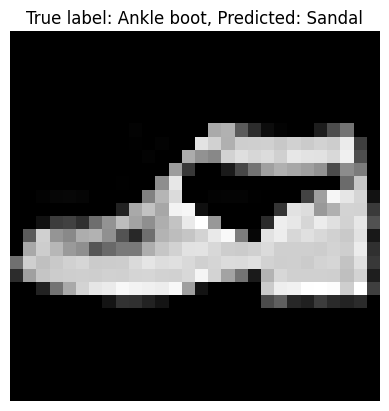

In [19]:
import torch
import matplotlib.pyplot as plt

# Pick a random image from the test set
X, y = next(iter(test_iter))  # a batch
i = torch.randint(0, len(X), (1,)).item()

img = X[i]
true_label = y[i].item()

# Get prediction (must add batch dimension)
with torch.no_grad():
    logits = net(img.unsqueeze(0))          # shape: [1, 10]
    probs = torch.softmax(logits, dim=1)    # convert to probabilities
    pred_label = probs.argmax(dim=1).item() # highest probability index
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print(f"True label: {classes[true_label]}, Predicted: {classes[pred_label]}")
print(f"Class probabilities:\n{probs.squeeze()}")

# Visualize the image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"True label: {classes[true_label]}, Predicted: {classes[pred_label]}")
plt.axis("off")
plt.show()
